In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets 
boston = datasets.load_boston()
import pickle

In [3]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [4]:
features.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
features.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
data = pd.concat([features,pd.Series(targets,name='MEDV')],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


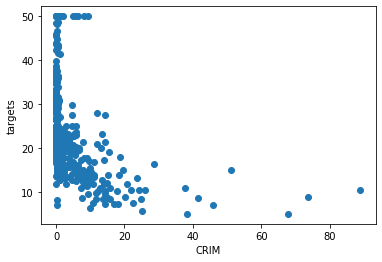

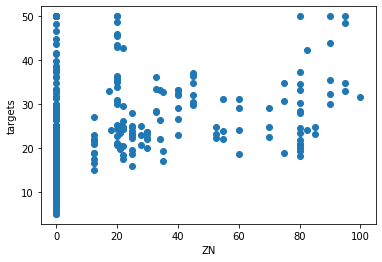

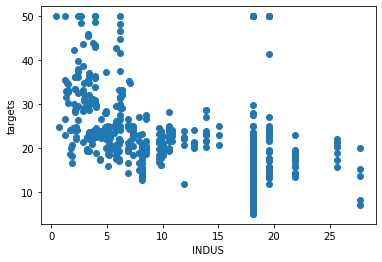

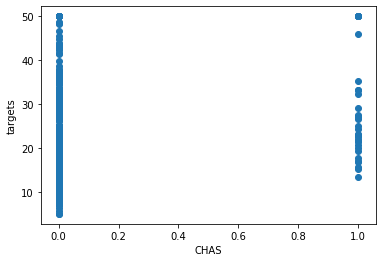

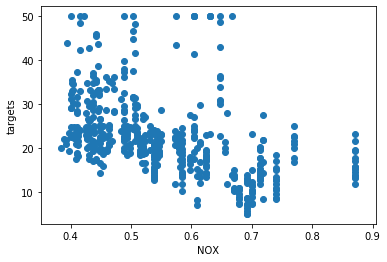

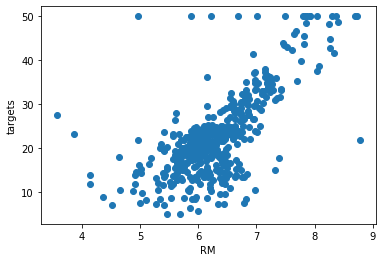

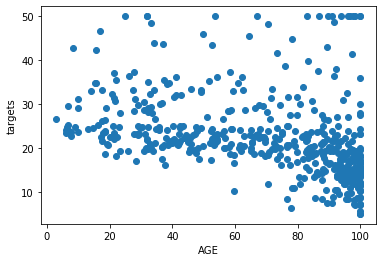

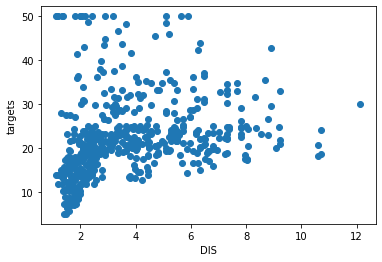

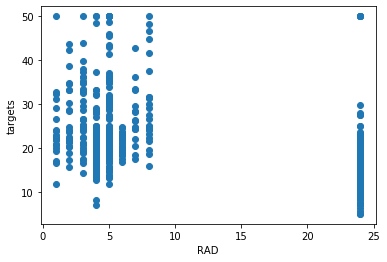

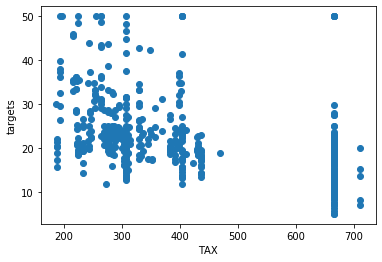

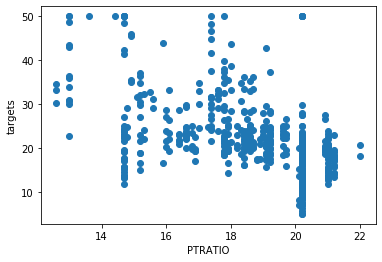

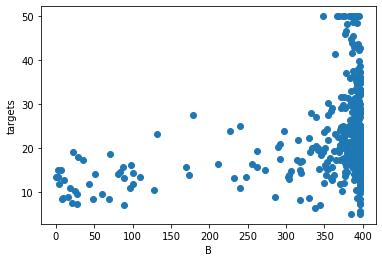

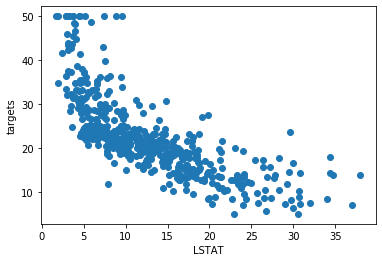

In [8]:
for col in features.columns:
    plt.scatter(features[col],targets)
    plt.xlabel(col)
    plt.ylabel('targets')
    plt.show()

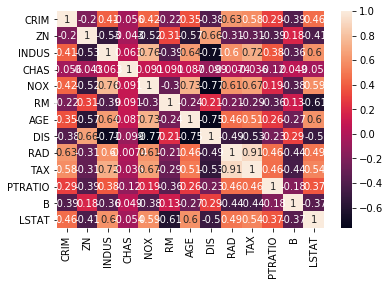

In [9]:
corr_matrics = features.corr()
sns.heatmap(data=corr_matrics,annot=True)

In [10]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [11]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(targets)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.10,random_state=50,shuffle=True)
rand1 = RandomForestRegressor(random_state=0,n_estimators=100)
rand1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [13]:
rand1.score(x_test,y_test)  

0.9086711979530397

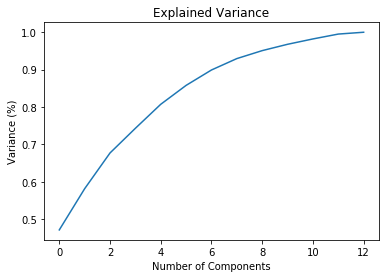

In [14]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # give the variance of x_scaled values
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [15]:
pca = PCA(n_components=12) # above components analysis we only 12 componenets are necessary 
new_data = pca.fit_transform(x_scaled)
#new_target = pca.fit_transform(targets)
x_train1,x_test1,y_train1,y_test1 = train_test_split(new_data,targets,test_size=0.10,random_state=100,shuffle=True)

In [16]:
#lab_enc = preprocessing.LabelEncoder() here we convert the continuous to categorical vaeiable by using the label encoder
#encoded = lab_enc.fit_transform(y_train)

In [17]:
rand_clf = RandomForestRegressor(random_state=10,n_estimators=100)
rand_clf.fit(x_train1,y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [18]:
rand_clf.score(x_test1,y_test1)

0.8962705307119543

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
y_predict = rand1.predict(x_train)
rmse= (np.sqrt(mean_squared_error(y_train,y_predict)))
r_sqr=r2_score(y_train,y_predict)

In [23]:
print('RMSE is {}  for the training set'.format(rmse))
print('r_square error is {} for the training set '.format(r_sqr))

RMSE is 1.280575711017647  for the training set
r_square error is 0.9800409599083489 for the training set 


In [25]:
y_test_predict = rand1.predict(x_test)
rmse_test = (np.sqrt(mean_squared_error(y_test,y_test_predict)))
r_squr_test=r2_score(y_test,y_test_predict)
print('RMSE is {} for the testing set'.format(rmse_test))
print('r_square is {} for the testing set'.format(r_squr_test))

RMSE is 3.060222787609411 for the testing set
r_square is 0.9086711979530397 for the testing set


In [31]:
# Let's create a function to create adjusted R-Squared
def adj_r2(x,y):
    r2 = rand1.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [32]:
print('adjusted r_square value for training ',adj_r2(x_train,y_train))
print('adjusted r_square value for testing ',adj_r2(x_test,y_test))

adjusted r_square value for training  0.9794525981822912
adjusted r_square value for testing  0.8765826999365403


In [20]:
#saving the model to the local file system
filename = "final_random_model.pickle"
pickle.dump(rand1, open(filename,'wb'))

In [21]:
load_model = pickle.load(open(filename,'rb'))
a=load_model.predict(scaler.transform([[0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98]]))
print(a)

[25.131]
